In [ ]:
# import library
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from scipy.stats import zscore
import matplotlib.pyplot as plt



In [ ]:
# file path
raw_df = pd.read_csv('/content/PID_197_cleanData.csv')

## clean data

In [ ]:
# define column
df = raw_df[["Response_ID","PID","Condition",
            # 0. Demographics
            "Demographics_1","Demographics_2","Demographics_3",
            # 1. Trust_propensity
            "Trust_propensity_1","Trust_propensity_2","Trust_propensity_3","Trust_propensity_4",
            # 2. General_Acceptance_and_Trust_towards_AI
            "General_Acceptance_and_Trust_towards_AI_1","General_Acceptance_and_Trust_towards_AI_2",
            "General_Acceptance_and_Trust_towards_AI_3","General_Acceptance_and_Trust_towards_AI_4",
            "General_Acceptance_and_Trust_towards_AI_5","General_Acceptance_and_Trust_towards_AI_6",
            "General_Acceptance_and_Trust_towards_AI_7","General_Acceptance_and_Trust_towards_AI_8",
            "General_Acceptance_and_Trust_towards_AI_9","General_Acceptance_and_Trust_towards_AI_10",
            "General_Acceptance_and_Trust_towards_AI_11","General_Acceptance_and_Trust_towards_AI_12",
            "General_Acceptance_and_Trust_towards_AI_13","General_Acceptance_and_Trust_towards_AI_14",
            "General_Acceptance_and_Trust_towards_AI_15","General_Acceptance_and_Trust_towards_AI_16",
            "General_Acceptance_and_Trust_towards_AI_17","General_Acceptance_and_Trust_towards_AI_18",
            "General_Acceptance_and_Trust_towards_AI_19","General_Acceptance_and_Trust_towards_AI_20","General_Acceptance_and_Trust_towards_AI_21",
            # 3. General_trust_towards_medical_professional_diagnosis
            "General_trust_towards_medical_professional_diagnosis_1","General_trust_towards_medical_professional_diagnosis_2",
            "General_trust_towards_medical_professional_diagnosis_3","General_trust_towards_medical_professional_diagnosis_4",
            "General_trust_towards_medical_professional_diagnosis_5","General_trust_towards_medical_professional_diagnosis_6",
            "General_trust_towards_medical_professional_diagnosis_7","General_trust_towards_medical_professional_diagnosis_8",
            "General_trust_towards_medical_professional_diagnosis_9","General_trust_towards_medical_professional_diagnosis_10",
            "General_trust_towards_medical_professional_diagnosis_11",
            # 4. Meta_AI_Literacy_Scale_use_and_apply
            "Meta_AI_Literacy_Scale_use_and_apply_1","Meta_AI_Literacy_Scale_use_and_apply_2",
            "Meta_AI_Literacy_Scale_use_and_apply_3","Meta_AI_Literacy_Scale_use_and_apply_4",
            "Meta_AI_Literacy_Scale_use_and_apply_5","Meta_AI_Literacy_Scale_use_and_apply_6",
            # 5. Meta_AI_Literacy_Scale_know_and_understand_AI
            "Meta_AI_Literacy_Scale_know_and_understand_AI_1","Meta_AI_Literacy_Scale_know_and_understand_AI_2",
            "Meta_AI_Literacy_Scale_know_and_understand_AI_3","Meta_AI_Literacy_Scale_know_and_understand_AI_4",
            "Meta_AI_Literacy_Scale_know_and_understand_AI_5",
            # 6. Meta_AI_Literacy_Scale_detect_AI
            "Meta_AI_Literacy_Scale_detect_AI_1","Meta_AI_Literacy_Scale_detect_AI_2",
            # 7. Meta_AI_Literacy_Scale_AI_ethics
            "Meta_AI_Literacy_Scale_AI_ethics_1","Meta_AI_Literacy_Scale_AI_ethics_2","Meta_AI_Literacy_Scale_AI_ethics_3",
            # 8. Likelihood_to_Accept
            "Likelihood_to_Accept_1",
            # text.  #"text_Likelihood_to_Accept",
            # 9. previous_Eczema
            "previous_Eczema_1","previous_Eczema_2",
            # 10. XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale
            "XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_1","XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_2",
            "XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_3","XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_4",
            "XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_5","XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_6",
            "XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_7","XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_8",
            # 11. Trust
            "Trust_1","Trust_2","Trust_3","Trust_4","Trust_5","Trust_6","Trust_7","Trust_8","Trust_9","Trust_10","Trust_11","Trust_12",
            # 12. Multimodal_no
            "Multimodal_no_1","Multimodal_no_2","Multimodal_no_3","Multimodal_no_4","Multimodal_no_5","Multimodal_no_6",
            "Multimodal_no_7","Multimodal_no_8","Multimodal_no_9","Multimodal_no_10","Multimodal_no_11","Multimodal_no_12",
            "Multimodal_no_13","Multimodal_no_14","Multimodal_no_15","Multimodal_no_16",
            # 13. Multimodal_Physical_Presence
            "Multimodal_Physical_Presence_1","Multimodal_Physical_Presence_2","Multimodal_Physical_Presence_3",
            "Multimodal_Physical_Presence_4","Multimodal_Physical_Presence_5",
            # 14. Multimodal_Social_Presence
            "Multimodal_Social_Presence_1","Multimodal_Social_Presence_2","Multimodal_Social_Presence_3",
            "Multimodal_Social_Presence_4","Multimodal_Social_Presence_5",
            # 15. Multimodal_Self_Presence
            "Multimodal_Self_Presence_1","Multimodal_Self_Presence_2","Multimodal_Self_Presence_3",
            "Multimodal_Self_Presence_4","Multimodal_Self_Presence_5",
            # 16. NASA-TLX20
            "NASA-TLX20_1","NASA-TLX20_2","NASA-TLX20_3",
            # 17. COMRADE_Satisfaction5
            "COMRADE_Satisfaction5_1","COMRADE_Satisfaction5_2","COMRADE_Satisfaction5_3","COMRADE_Satisfaction5_4",
            "COMRADE_Satisfaction5_5","COMRADE_Satisfaction5_6","COMRADE_Satisfaction5_7","COMRADE_Satisfaction5_8",
            "COMRADE_Satisfaction5_9","COMRADE_Satisfaction5_10",
            # 18. COMRADE_Confidence5
            "COMRADE_Confidence5_1","COMRADE_Confidence5_2","COMRADE_Confidence5_3","COMRADE_Confidence5_4",
            "COMRADE_Confidence5_5","COMRADE_Confidence5_6","COMRADE_Confidence5_7","COMRADE_Confidence5_8",
            "COMRADE_Confidence5_9","COMRADE_Confidence5_10",
            # 19. Perceived_Professionalism5
            "Perceived_Professionalism5_1","Perceived_Professionalism5_2","Perceived_Professionalism5_3",
            "Perceived_Professionalism5_4","Perceived_Professionalism5_5",
            # 20. Godspeed_Questionnaire_Perceived_Anthropomorphism5
            "Godspeed_Questionnaire_Perceived_Anthropomorphism5_1","Godspeed_Questionnaire_Perceived_Anthropomorphism5_2",
            "Godspeed_Questionnaire_Perceived_Anthropomorphism5_3","Godspeed_Questionnaire_Perceived_Anthropomorphism5_4",
            # 21. Godspeed_Questionnaire_Perceived_Intelligence5
            "Godspeed_Questionnaire_Perceived_Intelligence5_1","Godspeed_Questionnaire_Perceived_Intelligence5_2",
            "Godspeed_Questionnaire_Perceived_Intelligence5_3","Godspeed_Questionnaire_Perceived_Intelligence5_4",
            "Godspeed_Questionnaire_Perceived_Intelligence5_5",
            # 22. text
            # "text_Explanation_Feedback_1","text_Explanation_Feedback_2"

            ]]

# fill NAN to 0
df = df.fillna(0)


# reverse question * 9
df["General_trust_towards_medical_professional_diagnosis_1"] = 8 - df["General_trust_towards_medical_professional_diagnosis_1"]
df["General_trust_towards_medical_professional_diagnosis_5"] = 8 - df["General_trust_towards_medical_professional_diagnosis_5"]
df["General_trust_towards_medical_professional_diagnosis_7"] = 8 - df["General_trust_towards_medical_professional_diagnosis_7"]
df["General_trust_towards_medical_professional_diagnosis_11"] = 8 - df["General_trust_towards_medical_professional_diagnosis_11"]
df["Trust_1"] = 8 - df["Trust_1"]
df["Trust_2"] = 8 - df["Trust_2"]
df["Trust_3"] = 8 - df["Trust_3"]
df["Trust_4"] = 8 - df["Trust_4"]
df["Trust_5"] = 8 - df["Trust_5"]


# average category

# 1
df["C1_Trust_propensity"] = (df["Trust_propensity_1"] + df["Trust_propensity_2"] + df["Trust_propensity_3"] + df["Trust_propensity_4"])/4
# 2
df["C2_General_Acceptance_and_Trust_towards_AI"] = ( df["General_Acceptance_and_Trust_towards_AI_1"]+df["General_Acceptance_and_Trust_towards_AI_2"]\
+df["General_Acceptance_and_Trust_towards_AI_3"]+df["General_Acceptance_and_Trust_towards_AI_4"]+df["General_Acceptance_and_Trust_towards_AI_5"]\
+df["General_Acceptance_and_Trust_towards_AI_6"]+df["General_Acceptance_and_Trust_towards_AI_7"]+df["General_Acceptance_and_Trust_towards_AI_8"]\
+df["General_Acceptance_and_Trust_towards_AI_9"]+df["General_Acceptance_and_Trust_towards_AI_10"]+df["General_Acceptance_and_Trust_towards_AI_11"]\
+df["General_Acceptance_and_Trust_towards_AI_12"]+df["General_Acceptance_and_Trust_towards_AI_13"]+df["General_Acceptance_and_Trust_towards_AI_14"]\
+df["General_Acceptance_and_Trust_towards_AI_15"]+df["General_Acceptance_and_Trust_towards_AI_16"]+df["General_Acceptance_and_Trust_towards_AI_17"]\
+df["General_Acceptance_and_Trust_towards_AI_18"]+df["General_Acceptance_and_Trust_towards_AI_19"]+df["General_Acceptance_and_Trust_towards_AI_20"]\
+df["General_Acceptance_and_Trust_towards_AI_21"] )/21
# 3
df["C3_General_trust_towards_medical_professional_diagnosis"] = ( df["General_trust_towards_medical_professional_diagnosis_1"]+df["General_trust_towards_medical_professional_diagnosis_2"]\
+df["General_trust_towards_medical_professional_diagnosis_3"]+df["General_trust_towards_medical_professional_diagnosis_4"]+df["General_trust_towards_medical_professional_diagnosis_5"]\
+df["General_trust_towards_medical_professional_diagnosis_6"]+df["General_trust_towards_medical_professional_diagnosis_7"]+df["General_trust_towards_medical_professional_diagnosis_8"]\
+df["General_trust_towards_medical_professional_diagnosis_9"]+df["General_trust_towards_medical_professional_diagnosis_10"]\
+df["General_trust_towards_medical_professional_diagnosis_11"] ) / 11
# 4
df["C4_Meta_AI_Literacy_Scale_use_and_apply"] = ( df["Meta_AI_Literacy_Scale_use_and_apply_1"] + df["Meta_AI_Literacy_Scale_use_and_apply_2"]\
+df["Meta_AI_Literacy_Scale_use_and_apply_3"]+df["Meta_AI_Literacy_Scale_use_and_apply_4"]+df["Meta_AI_Literacy_Scale_use_and_apply_5"]\
+df["Meta_AI_Literacy_Scale_use_and_apply_6"] ) / 6
# 5
df["C5_Meta_AI_Literacy_Scale_know_and_understand_AI"] = ( df["Meta_AI_Literacy_Scale_know_and_understand_AI_1"] + df["Meta_AI_Literacy_Scale_know_and_understand_AI_2"]\
+df["Meta_AI_Literacy_Scale_know_and_understand_AI_3"]+df["Meta_AI_Literacy_Scale_know_and_understand_AI_4"]\
+df["Meta_AI_Literacy_Scale_know_and_understand_AI_5"] ) / 5
# 6
df["C6_Meta_AI_Literacy_Scale_detect_AI"] = ( df["Meta_AI_Literacy_Scale_detect_AI_1"] + df["Meta_AI_Literacy_Scale_detect_AI_2"] )/ 2
# 7
df["C7_Meta_AI_Literacy_Scale_AI_ethics"] = ( df["Meta_AI_Literacy_Scale_AI_ethics_1"] + df["Meta_AI_Literacy_Scale_AI_ethics_2"] + df["Meta_AI_Literacy_Scale_AI_ethics_3"] )/ 3
# 8 is target
#df["Likelihood_to_Accept"] =
# 9 is category: 0 1
#df["previous_Eczema"] =
# 10
df["C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale"] = ( df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_1"] + df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_2"]\
+df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_3"]+df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_4"]\
+df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_5"]+df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_6"]\
+df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_7"]+df["XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale_8"] )/8
# 11
df["C11_Trust"] = ( df["Trust_1"] + df["Trust_2"] + df["Trust_3"] + df["Trust_4"] + df["Trust_5"] + df["Trust_6"] + df["Trust_7"]\
               + df["Trust_8"] + df["Trust_9"] + df["Trust_10"] + df["Trust_11"] + df["Trust_12"] )/12
# 12
df["C12_Multimodal_no"] = ( df["Multimodal_no_1"]+df["Multimodal_no_2"]+df["Multimodal_no_3"]+df["Multimodal_no_4"]+df["Multimodal_no_5"]\
+df["Multimodal_no_6"]+df["Multimodal_no_7"]+df["Multimodal_no_8"]+df["Multimodal_no_9"]+df["Multimodal_no_10"]+df["Multimodal_no_11"]\
+df["Multimodal_no_12"]+df["Multimodal_no_13"]+df["Multimodal_no_14"]+df["Multimodal_no_15"]+df["Multimodal_no_16"] )/16
# 13
df["C13_Multimodal_Physical_Presence"] = ( df["Multimodal_Physical_Presence_1"]+df["Multimodal_Physical_Presence_2"]+df["Multimodal_Physical_Presence_3"]\
+df["Multimodal_Physical_Presence_4"]+df["Multimodal_Physical_Presence_5"] )/5
# 14
df["C14_Multimodal_Social_Presence"] = ( df["Multimodal_Social_Presence_1"]+df["Multimodal_Social_Presence_2"]+df["Multimodal_Social_Presence_3"]\
+df["Multimodal_Social_Presence_4"]+df["Multimodal_Social_Presence_5"] ) /5
# 15
df["C15_Multimodal_Self_Presence"] = ( df["Multimodal_Self_Presence_1"]+df["Multimodal_Self_Presence_2"]+df["Multimodal_Self_Presence_3"]\
+df["Multimodal_Self_Presence_4"]+df["Multimodal_Self_Presence_5"] ) /5
# 16
df["C16_NASA-TLX20"] = ( df["NASA-TLX20_1"]+df["NASA-TLX20_2"]+df["NASA-TLX20_3"] )/3
# 17
df["C17_COMRADE_Satisfaction5"] = ( df["COMRADE_Satisfaction5_1"] + df["COMRADE_Satisfaction5_2"] + df["COMRADE_Satisfaction5_3"]\
 + df["COMRADE_Satisfaction5_4"] + df["COMRADE_Satisfaction5_5"] + df["COMRADE_Satisfaction5_6"] + df["COMRADE_Satisfaction5_7"]\
  + df["COMRADE_Satisfaction5_8"] + df["COMRADE_Satisfaction5_9"] + df["COMRADE_Satisfaction5_10"] )/10
# 18
df["C18_COMRADE_Confidence5"] = ( df["COMRADE_Confidence5_1"] + df["COMRADE_Confidence5_2"] + df["COMRADE_Confidence5_3"]\
 + df["COMRADE_Confidence5_4"] + df["COMRADE_Confidence5_5"] + df["COMRADE_Confidence5_6"] + df["COMRADE_Confidence5_7"]\
  + df["COMRADE_Confidence5_8"] + df["COMRADE_Confidence5_9"] + df["COMRADE_Confidence5_10"] )/10
# 19
df["C19_Perceived_Professionalism5"] = ( df["Perceived_Professionalism5_1"] + df["Perceived_Professionalism5_2"] + df["Perceived_Professionalism5_3"]\
 + df["Perceived_Professionalism5_4"] + df["Perceived_Professionalism5_5"] )/5
# 20
df["C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5"] = ( df["Godspeed_Questionnaire_Perceived_Anthropomorphism5_1"] + df["Godspeed_Questionnaire_Perceived_Anthropomorphism5_2"]\
                                                                + df["Godspeed_Questionnaire_Perceived_Anthropomorphism5_3"] + df["Godspeed_Questionnaire_Perceived_Anthropomorphism5_4"] )/4
# 21
df["C21_Godspeed_Questionnaire_Perceived_Intelligence5"] = ( df["Godspeed_Questionnaire_Perceived_Intelligence5_1"] + df["Godspeed_Questionnaire_Perceived_Intelligence5_2"]\
                                                                + df["Godspeed_Questionnaire_Perceived_Intelligence5_3"] + df["Godspeed_Questionnaire_Perceived_Intelligence5_4"]\
                                                                + df["Godspeed_Questionnaire_Perceived_Intelligence5_5"] )/5
# 29
df["C29_Meta_AI_Literacy_Scale_all"] = ( df["Meta_AI_Literacy_Scale_use_and_apply_1"] + df["Meta_AI_Literacy_Scale_use_and_apply_2"]\
+df["Meta_AI_Literacy_Scale_use_and_apply_3"]+df["Meta_AI_Literacy_Scale_use_and_apply_4"]+df["Meta_AI_Literacy_Scale_use_and_apply_5"]\
+df["Meta_AI_Literacy_Scale_use_and_apply_6"] + df["Meta_AI_Literacy_Scale_know_and_understand_AI_1"] + df["Meta_AI_Literacy_Scale_know_and_understand_AI_2"]\
+df["Meta_AI_Literacy_Scale_know_and_understand_AI_3"]+df["Meta_AI_Literacy_Scale_know_and_understand_AI_4"]\
+df["Meta_AI_Literacy_Scale_know_and_understand_AI_5"]+ df["Meta_AI_Literacy_Scale_detect_AI_1"] + df["Meta_AI_Literacy_Scale_detect_AI_2"]\
+df["Meta_AI_Literacy_Scale_AI_ethics_1"] + df["Meta_AI_Literacy_Scale_AI_ethics_2"] + df["Meta_AI_Literacy_Scale_AI_ethics_3"]) /16


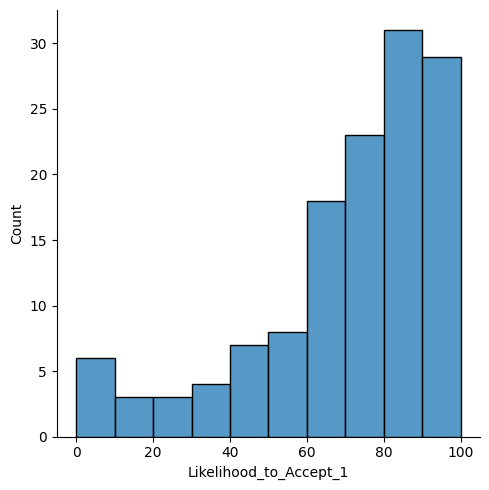

In [ ]:
# Distribution
sns.displot(df, x="Likelihood_to_Accept_1")

In [ ]:
# standard
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

df["C1_Trust_propensity"] = scaler.fit_transform(df[["C1_Trust_propensity"]])
df["C2_General_Acceptance_and_Trust_towards_AI"] = scaler.fit_transform(df[["C2_General_Acceptance_and_Trust_towards_AI"]])
df["C3_General_trust_towards_medical_professional_diagnosis"] = scaler.fit_transform(df[["C3_General_trust_towards_medical_professional_diagnosis"]])
df["C4_Meta_AI_Literacy_Scale_use_and_apply"] = scaler.fit_transform(df[["C4_Meta_AI_Literacy_Scale_use_and_apply"]])
df["C5_Meta_AI_Literacy_Scale_know_and_understand_AI"] = scaler.fit_transform(df[["C5_Meta_AI_Literacy_Scale_know_and_understand_AI"]])
df["C6_Meta_AI_Literacy_Scale_detect_AI"] = scaler.fit_transform(df[["C6_Meta_AI_Literacy_Scale_detect_AI"]])
df["C7_Meta_AI_Literacy_Scale_AI_ethics"] = scaler.fit_transform(df[["C7_Meta_AI_Literacy_Scale_AI_ethics"]])
df["R_Likelihood_to_Accept_1"] = scaler.fit_transform(df[["Likelihood_to_Accept_1"]])
df["C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale"] = scaler.fit_transform(df[["C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale"]])
df["C11_Trust"] = scaler.fit_transform(df[["C11_Trust"]])
df["C12_Multimodal_no"] = scaler.fit_transform(df[["C12_Multimodal_no"]])
df["C13_Multimodal_Physical_Presence"] = scaler.fit_transform(df[["C13_Multimodal_Physical_Presence"]])
df["C14_Multimodal_Social_Presence"] = scaler.fit_transform(df[["C14_Multimodal_Social_Presence"]])
df["C15_Multimodal_Self_Presence"] = scaler.fit_transform(df[["C15_Multimodal_Self_Presence"]])
df["C16_NASA-TLX20"] = scaler.fit_transform(df[["C16_NASA-TLX20"]])
df["C17_COMRADE_Satisfaction5"] = scaler.fit_transform(df[["C17_COMRADE_Satisfaction5"]])
df["C18_COMRADE_Confidence5"] = scaler.fit_transform(df[["C18_COMRADE_Confidence5"]])
df["C19_Perceived_Professionalism5"] = scaler.fit_transform(df[["C19_Perceived_Professionalism5"]])
df["C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5"] = scaler.fit_transform(df[["C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5"]])
df["C21_Godspeed_Questionnaire_Perceived_Intelligence5"] = scaler.fit_transform(df[["C21_Godspeed_Questionnaire_Perceived_Intelligence5"]])
df["C29_Meta_AI_Literacy_Scale_all"] = scaler.fit_transform(df[["C29_Meta_AI_Literacy_Scale_all"]])




In [ ]:
print(df["Likelihood_to_Accept_1"].mean(axis=0))

70.03030303030303


In [ ]:
print(df["Likelihood_to_Accept_1"].median(axis=0))

75.5


In [ ]:
# Categorical: "label_Likelihood_to_Accept_1"
# Continuous: "R_Likelihood_to_Accept_1"

# mean: 70 , median: 75
def label_Accept(x):
    if x > 70:
        return 1
    else:
        return 0



df["label_Likelihood_to_Accept_1"]= df["Likelihood_to_Accept_1"].apply(label_Accept)
need_df = df[["Response_ID","PID","Condition",
           # 0. Demographics
            "Demographics_1","Demographics_2","Demographics_3",
            # Z-score features
            "C1_Trust_propensity","C2_General_Acceptance_and_Trust_towards_AI",
              "C3_General_trust_towards_medical_professional_diagnosis", "C4_Meta_AI_Literacy_Scale_use_and_apply",
              "C5_Meta_AI_Literacy_Scale_know_and_understand_AI", "C6_Meta_AI_Literacy_Scale_detect_AI",
              "C7_Meta_AI_Literacy_Scale_AI_ethics", "C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale",
              "C11_Trust", "C12_Multimodal_no", "C13_Multimodal_Physical_Presence", "C14_Multimodal_Social_Presence",
              "C15_Multimodal_Self_Presence", "C16_NASA-TLX20", "C17_COMRADE_Satisfaction5", "C18_COMRADE_Confidence5",
              "C19_Perceived_Professionalism5", "C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5",
              "C21_Godspeed_Questionnaire_Perceived_Intelligence5", "C29_Meta_AI_Literacy_Scale_all",
              "R_Likelihood_to_Accept_1", "label_Likelihood_to_Accept_1","Likelihood_to_Accept_1"]]


need_df.value_counts("label_Likelihood_to_Accept_1")

,count
label_Likelihood_to_Accept_1,
1,77
0,55


In [ ]:
need_df

,Response_ID,PID,Condition,Demographics_1,Demographics_2,Demographics_3,C1_Trust_propensity,C2_General_Acceptance_and_Trust_towards_AI,C3_General_trust_towards_medical_professional_diagnosis,C4_Meta_AI_Literacy_Scale_use_and_apply,...,C16_NASA-TLX20,C17_COMRADE_Satisfaction5,C18_COMRADE_Confidence5,C19_Perceived_Professionalism5,C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5,C21_Godspeed_Questionnaire_Perceived_Intelligence5,C29_Meta_AI_Literacy_Scale_all,R_Likelihood_to_Accept_1,label_Likelihood_to_Accept_1,Likelihood_to_Accept_1
0,36127401,1,1,2,5,3,1.557937,-0.361996,2.708358,0.557087,...,-1.582011,0.421148,0.790189,0.945153,-0.535340,1.518470,1.015255,1.105365,1,98
1,36132699,2,2,2,5,1,0.132656,0.897413,1.232181,1.171162,...,-1.281867,1.075167,1.137872,1.430602,0.515438,0.491899,0.936654,0.986804,1,95
2,36147343,4,4,1,4,1,0.336268,-0.139747,-0.646590,-0.056988,...,1.344397,-0.341873,-0.484649,0.216981,0.778133,0.235256,1.093855,0.394003,1,80
3,36149983,5,5,1,4,1,-0.681790,0.452916,-0.512392,0.710606,...,0.594036,0.748158,0.674295,0.702429,0.252744,0.235256,1.172455,-0.119758,0,67
4,36154834,7,7,2,4,1,0.947102,0.601081,0.426993,0.250050,...,0.068783,-0.123867,-0.716438,-0.511192,-0.272645,-0.021387,0.543652,-0.198798,0,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,37634102,191,2,1,5,6,-0.070956,0.378833,-1.183382,-0.517544,...,-1.281867,0.421148,0.210717,0.216981,-0.009951,-0.534672,-0.006550,0.473043,1,82
128,37638530,193,4,1,4,4,-1.292625,-0.510162,1.097983,-0.364026,...,0.969216,0.748158,0.210717,0.216981,-0.535340,0.235256,-0.242351,-0.198798,0,65
129,37638651,194,5,1,4,4,0.743491,0.823330,0.561191,0.403568,...,0.443964,0.421148,-0.136966,-0.268468,0.778133,0.235256,-0.163751,-0.593999,0,55
130,37690317,196,7,2,4,3,-0.885402,0.452916,-0.914986,-0.517544,...,-0.756614,-0.123867,-0.716438,0.459705,-0.798034,0.235256,-1.185555,-1.977202,0,20


In [ ]:
# gaze data

# file path
gaze_df = pd.read_csv('/content/allGaze.csv')

# combine df
combine_df = pd.concat([need_df, gaze_df], axis=1, join="inner")
list(combine_df)


['Response_ID',
 'PID',
 'Condition',
 'Demographics_1',
 'Demographics_2',
 'Demographics_3',
 'C1_Trust_propensity',
 'C2_General_Acceptance_and_Trust_towards_AI',
 'C3_General_trust_towards_medical_professional_diagnosis',
 'C4_Meta_AI_Literacy_Scale_use_and_apply',
 'C5_Meta_AI_Literacy_Scale_know_and_understand_AI',
 'C6_Meta_AI_Literacy_Scale_detect_AI',
 'C7_Meta_AI_Literacy_Scale_AI_ethics',
 'C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale',
 'C11_Trust',
 'C12_Multimodal_no',
 'C13_Multimodal_Physical_Presence',
 'C14_Multimodal_Social_Presence',
 'C15_Multimodal_Self_Presence',
 'C16_NASA-TLX20',
 'C17_COMRADE_Satisfaction5',
 'C18_COMRADE_Confidence5',
 'C19_Perceived_Professionalism5',
 'C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5',
 'C21_Godspeed_Questionnaire_Perceived_Intelligence5',
 'C29_Meta_AI_Literacy_Scale_all',
 'R_Likelihood_to_Accept_1',
 'label_Likelihood_to_Accept_1',
 'Likelihood_to_Accept_1',
 'ParticipantID',
 'Vive_Eye_Left_Blink',

In [ ]:
# check NaN
combine_df.isna().sum()

,0
Response_ID,0
PID,0
Condition,0
Demographics_1,0
Demographics_2,0
Demographics_3,0
C1_Trust_propensity,0
C2_General_Acceptance_and_Trust_towards_AI,0
C3_General_trust_towards_medical_professional_diagnosis,0
C4_Meta_AI_Literacy_Scale_use_and_apply,0


In [ ]:
# standardise gaze data
from sklearn.preprocessing import StandardScaler, OneHotEncoder
# Scaling numeric data
scaler = StandardScaler()
combine_df["C22_Vive_sum_Blink"] = scaler.fit_transform(combine_df[["Vive_sum_Blink"]])
combine_df["C23_Vive_sum_Wide"] = scaler.fit_transform(combine_df[["Vive_sum_Wide"]])
combine_df["C24_Vive_sum_Squeeze"] = scaler.fit_transform(combine_df[["Vive_sum_Squeeze"]])
combine_df["C25_PupilDilation_sum"] = scaler.fit_transform(combine_df[["PupilDilation_sum"]])
combine_df["C26_EyeClosed_sum"] = scaler.fit_transform(combine_df[["EyeClosed_sum"]])
combine_df["C27_CurrentBlink_Duration"] = scaler.fit_transform(combine_df[["CurrentBlink_Duration"]])
combine_df["C28_CurrentBlink_Interval"] = scaler.fit_transform(combine_df[["CurrentBlink_Interval"]])

In [ ]:
# split C & F
def control(a):
    if a == 1 or a == 4 or a == 7:
        return 0 # C
    else:
        return 1 # F

combine_df["control"]= combine_df["Condition"].apply(control)
combine_df[["control","Condition"]].head(10)

,control,Condition
0,0,1
1,1,2
2,0,4
3,1,5
4,0,7
5,1,8
6,0,1
7,1,2
8,0,4
9,1,5


In [ ]:
# final df
all_df = combine_df[["Response_ID","PID","Condition", "control",
           # 0. Demographics
            "Demographics_1","Demographics_2","Demographics_3",
            # scale features
            "C1_Trust_propensity","C2_General_Acceptance_and_Trust_towards_AI",
              "C3_General_trust_towards_medical_professional_diagnosis", "C4_Meta_AI_Literacy_Scale_use_and_apply",
              "C5_Meta_AI_Literacy_Scale_know_and_understand_AI", "C6_Meta_AI_Literacy_Scale_detect_AI",
              "C7_Meta_AI_Literacy_Scale_AI_ethics", "C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale",
              "C11_Trust", "C12_Multimodal_no", "C13_Multimodal_Physical_Presence", "C14_Multimodal_Social_Presence",
              "C15_Multimodal_Self_Presence", "C16_NASA-TLX20", "C17_COMRADE_Satisfaction5", "C18_COMRADE_Confidence5",
              "C19_Perceived_Professionalism5", "C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5",
              "C21_Godspeed_Questionnaire_Perceived_Intelligence5",
              "R_Likelihood_to_Accept_1", "label_Likelihood_to_Accept_1", "Likelihood_to_Accept_1",
              "C22_Vive_sum_Blink", "C23_Vive_sum_Wide", "C24_Vive_sum_Squeeze",
              "C25_PupilDilation_sum", "C26_EyeClosed_sum",
              "C27_CurrentBlink_Duration", "C28_CurrentBlink_Interval", "C29_Meta_AI_Literacy_Scale_all"
              ]]
list(all_df)

['Response_ID',
 'PID',
 'Condition',
 'control',
 'Demographics_1',
 'Demographics_2',
 'Demographics_3',
 'C1_Trust_propensity',
 'C2_General_Acceptance_and_Trust_towards_AI',
 'C3_General_trust_towards_medical_professional_diagnosis',
 'C4_Meta_AI_Literacy_Scale_use_and_apply',
 'C5_Meta_AI_Literacy_Scale_know_and_understand_AI',
 'C6_Meta_AI_Literacy_Scale_detect_AI',
 'C7_Meta_AI_Literacy_Scale_AI_ethics',
 'C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale',
 'C11_Trust',
 'C12_Multimodal_no',
 'C13_Multimodal_Physical_Presence',
 'C14_Multimodal_Social_Presence',
 'C15_Multimodal_Self_Presence',
 'C16_NASA-TLX20',
 'C17_COMRADE_Satisfaction5',
 'C18_COMRADE_Confidence5',
 'C19_Perceived_Professionalism5',
 'C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5',
 'C21_Godspeed_Questionnaire_Perceived_Intelligence5',
 'R_Likelihood_to_Accept_1',
 'label_Likelihood_to_Accept_1',
 'Likelihood_to_Accept_1',
 'C22_Vive_sum_Blink',
 'C23_Vive_sum_Wide',
 'C24_Vive_sum_Sque

In [ ]:
# Accept_C : 0
accept_C = all_df[all_df["control"] == 0]
accept_C.value_counts("label_Likelihood_to_Accept_1")


,count
label_Likelihood_to_Accept_1,
1,36
0,30


In [ ]:
# Accept_F : 1
accept_F = all_df[all_df["control"] == 1]
accept_F.value_counts("label_Likelihood_to_Accept_1")

,count
label_Likelihood_to_Accept_1,
1,41
0,24


In [ ]:
# set x, y
# remove C12 C13 C14 C15
features = ["control", "C1_Trust_propensity", "C2_General_Acceptance_and_Trust_towards_AI",
            "C3_General_trust_towards_medical_professional_diagnosis",
            "C4_Meta_AI_Literacy_Scale_use_and_apply",#"C5_Meta_AI_Literacy_Scale_know_and_understand_AI", "C6_Meta_AI_Literacy_Scale_detect_AI","C7_Meta_AI_Literacy_Scale_AI_ethics",
            "C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale",
            "C11_Trust",
            #"C12_Multimodal_no", "C13_Multimodal_Physical_Presence", "C14_Multimodal_Social_Presence","C15_Multimodal_Self_Presence",
            "C16_NASA-TLX20",
            "C17_COMRADE_Satisfaction5", "C18_COMRADE_Confidence5",
            "C19_Perceived_Professionalism5", "C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5",
            "C21_Godspeed_Questionnaire_Perceived_Intelligence5",
            "C22_Vive_sum_Blink","C23_Vive_sum_Wide","C24_Vive_sum_Squeeze","C25_PupilDilation_sum","C26_EyeClosed_sum",
            "C27_CurrentBlink_Duration","C28_CurrentBlink_Interval","C29_Meta_AI_Literacy_Scale_all"]


# X = z_df[features]
# 連續 y = z_df["R_Likelihood_to_Accept_1"]
# 分類 y = z_df["label_Likelihood_to_Accept_1"]



## Multiple Regression: P value

https://www.digitalocean.com/community/tutorials/multiple-linear-regression-python



In [ ]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score


X = accept_F[features]
y = accept_F["R_Likelihood_to_Accept_1"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 30)


model = LinearRegression()
model.fit(X_train, y_train)

# The model is used to predict the target variable for the test set.
y_pred = model.predict(X_test)


print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-squared:", r2_score(y_test, y_pred))

Mean Squared Error: 1.6497586431722389
R-squared: -0.6538845028350455


                               OLS Regression Results                               
Dep. Variable:     R_Likelihood_to_Accept_1   R-squared:                       0.594
Model:                                  OLS   Adj. R-squared:                  0.332
Method:                       Least Squares   F-statistic:                     2.267
Date:                      Mon, 18 Aug 2025   Prob (F-statistic):             0.0198
Time:                              11:24:00   Log-Likelihood:                -41.929
No. Observations:                        52   AIC:                             125.9
Df Residuals:                            31   BIC:                             166.8
Df Model:                                20                                         
Covariance Type:                  nonrobust                                         
                                                                   coef    std err          t      P>|t|      [0.025      0.975]
---------------------

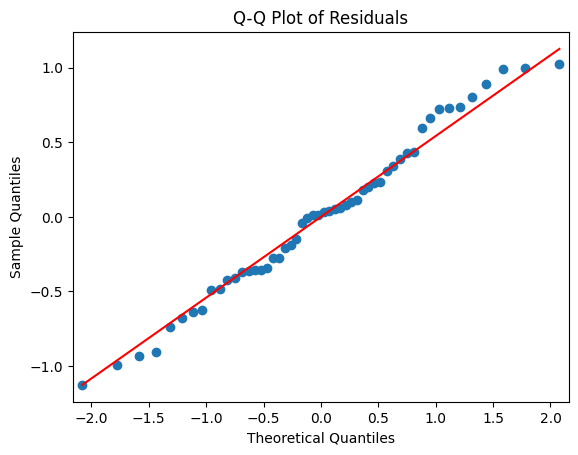

In [ ]:
# all_P value
# stat
import statsmodels.api as sm

# Add a constant to the model
X_train_sm = sm.add_constant(X_train)
model_sm = sm.OLS(y_train, X_train_sm).fit()
print(model_sm.summary())

# Q-Q Plot for residuals
sm.qqplot(model_sm.resid, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

In [ ]:
#correlation >= 0.3 : C10 C11 C17 C18 C19 C21
correlation_matrix = all_df.corr()
print(correlation_matrix['R_Likelihood_to_Accept_1'])
print("correlation >= 0.3")
print(correlation_matrix['R_Likelihood_to_Accept_1']>= 0.3)

Response_ID                                                    -0.150344
PID                                                            -0.108795
Condition                                                      -0.027258
control                                                         0.102485
Demographics_1                                                  0.038842
Demographics_2                                                  0.004901
Demographics_3                                                 -0.020921
C1_Trust_propensity                                             0.182197
C2_General_Acceptance_and_Trust_towards_AI                      0.209119
C3_General_trust_towards_medical_professional_diagnosis        -0.042913
C4_Meta_AI_Literacy_Scale_use_and_apply                         0.145551
C5_Meta_AI_Literacy_Scale_know_and_understand_AI                0.009894
C6_Meta_AI_Literacy_Scale_detect_AI                             0.013860
C7_Meta_AI_Literacy_Scale_AI_ethics                

In [ ]:
#correlation >= 0.3 : C10 C11 C17 C18 C19 C21
correlation_matrix = accept_C.corr()
print(correlation_matrix['R_Likelihood_to_Accept_1'])
print("correlation >= 0.3")
print(correlation_matrix['R_Likelihood_to_Accept_1']>= 0.3)

Response_ID                                                    -0.160894
PID                                                            -0.110761
Condition                                                      -0.148475
control                                                              NaN
Demographics_1                                                  0.024824
Demographics_2                                                  0.028482
Demographics_3                                                  0.088042
C1_Trust_propensity                                             0.212484
C2_General_Acceptance_and_Trust_towards_AI                      0.212902
C3_General_trust_towards_medical_professional_diagnosis        -0.063435
C4_Meta_AI_Literacy_Scale_use_and_apply                         0.242095
C5_Meta_AI_Literacy_Scale_know_and_understand_AI                0.070550
C6_Meta_AI_Literacy_Scale_detect_AI                             0.153563
C7_Meta_AI_Literacy_Scale_AI_ethics                

In [ ]:
#correlation >= 0.3 : C10 C11 C17 C18 C19 C21
correlation_matrix = accept_F.corr()
print(correlation_matrix['R_Likelihood_to_Accept_1'])
print("correlation >= 0.3")
print(correlation_matrix['R_Likelihood_to_Accept_1']>= 0.3)

Response_ID                                                    -0.140586
PID                                                            -0.107803
Condition                                                       0.078613
control                                                              NaN
Demographics_1                                                  0.057052
Demographics_2                                                 -0.055760
Demographics_3                                                 -0.158575
C1_Trust_propensity                                             0.178867
C2_General_Acceptance_and_Trust_towards_AI                      0.167376
C3_General_trust_towards_medical_professional_diagnosis         0.012290
C4_Meta_AI_Literacy_Scale_use_and_apply                        -0.018230
C5_Meta_AI_Literacy_Scale_know_and_understand_AI               -0.048154
C6_Meta_AI_Literacy_Scale_detect_AI                            -0.128642
C7_Meta_AI_Literacy_Scale_AI_ethics                

## Random Forest


In [ ]:
# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
# set x, y

X = all_df[features]
y = all_df["label_Likelihood_to_Accept_1"]

# train, test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

In [ ]:
# Fitting and Evaluating the Random Forest Model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# evaluate
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Accuracy: 0.7777777777777778
Precision: 0.8235294117647058
Recall: 0.8235294117647058
F1 Score: 0.8235294117647058


Feature Importances:
C11_Trust: 0.1249
C18_COMRADE_Confidence5: 0.0717
C19_Perceived_Professionalism5: 0.0576
C27_CurrentBlink_Duration: 0.0567
C3_General_trust_towards_medical_professional_diagnosis: 0.0566
C22_Vive_sum_Blink: 0.0518
C23_Vive_sum_Wide: 0.0505
C2_General_Acceptance_and_Trust_towards_AI: 0.0469
C10_XAI_Evaluation_Explanation_Satisfaction_Usefulness_Scale: 0.0469
C29_Meta_AI_Literacy_Scale_all: 0.0465
C24_Vive_sum_Squeeze: 0.0440
C25_PupilDilation_sum: 0.0438
C28_CurrentBlink_Interval: 0.0429
C16_NASA-TLX20: 0.0428
C26_EyeClosed_sum: 0.0425
C21_Godspeed_Questionnaire_Perceived_Intelligence5: 0.0423
C17_COMRADE_Satisfaction5: 0.0330
C1_Trust_propensity: 0.0325
C20_Godspeed_Questionnaire_Perceived_Anthropomorphism5: 0.0318
C4_Meta_AI_Literacy_Scale_use_and_apply: 0.0265
control: 0.0078


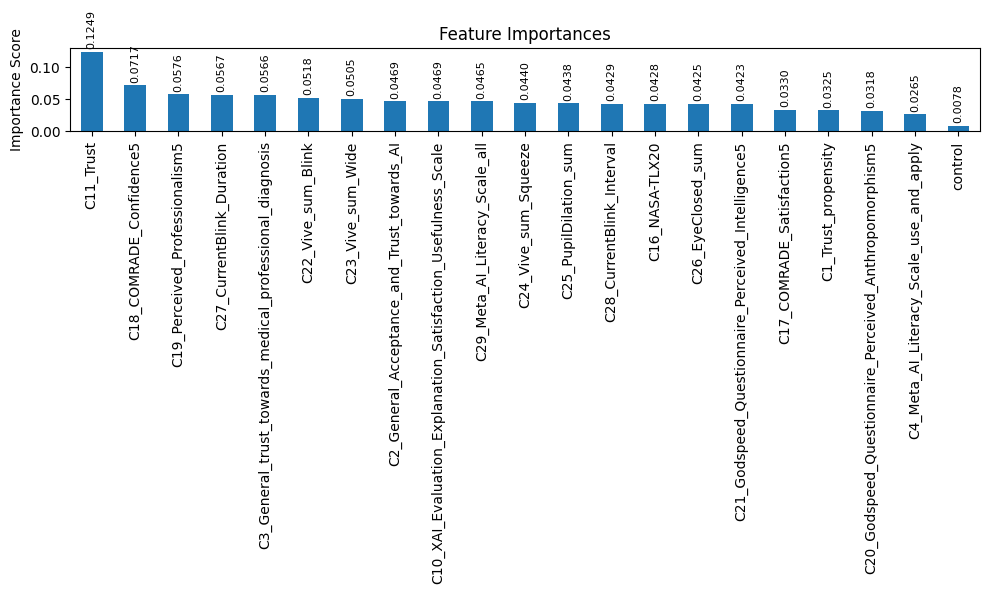

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# create a Series, feature importance
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# output the features and their importance values
print("Feature Importances:")
for feature, importance in feature_importances.items():
    print(f"{feature}: {importance:.4f}")

# plot
ax = feature_importances.plot.bar(figsize=(10, 6))
plt.title("Feature Importances")
plt.ylabel("Importance Score")

# feature importance value
for i, v in enumerate(feature_importances):
    ax.text(i, v + 0.005, f"{v:.4f}", ha='center', va='bottom', fontsize=8, rotation=90)

plt.tight_layout()
plt.show()